This is a very brief intro to some of the libraries and Jupyter Notebook features that we will use for the labs.

You can skip it if you are already familiar with Python, Jupyter, Numpy, Matplotlib, and have heard of Scikit-learn, Scipy and the idea behind random seeds / random states.

# Notebooks

We will use Jupyter (https://jupyter.org/) notebooks to visualize data and execute Python code.

We can define function and variables in cells, that can be used later.

In [47]:
# Define a function
def add(a: int, b: int) -> int:
    """Return the sum of a and b"""
    return a + b

In [74]:
# Define variables
a = 3
b = 5
# equivalently, we could write a, b = 3, 5

In [75]:
# Add a and b and display the result
add(a, b)

8

Functions can also be defined in separate files, and imported.

In [0]:
#TODO: copy this function in file myfunctions.py and remove this cell without running it.
def multiply(a: int, b: int) -> int:
    """Return the product of a and b"""
    return a * b

In [0]:
# Make sure that myfunctions.py containing the definition of multiply is located in the same folder as the notebook.
from myfunctions import multiply

In [45]:
multiply(a, b)

15

We can also use "magic" command like %%time at the beginning of cells to do various tasks, like measuring how much time it takes for some code to run.

In [115]:
%%time
a = 0
# increment variable a ten million times
for i in range(10000000):
    a += 1

CPU times: user 675 ms, sys: 0 ns, total: 675 ms
Wall time: 674 ms


The code above took 670 ms about to run on my computer.

Comment sections, titles etc (similar to this cell and others above) can also be inserted in notebooks by changing the cell type.

In general, don't hesitate to have a look at the documentation of tools we use, in this case https://docs.jupyter.org/en/latest/

Or you can use this cheatsheet: https://images.datacamp.com/image/upload/v1676302533/Marketing/Blog/Jupyterlab_Cheat_Sheet.pdf

Python cheatsheet: https://perso.limsi.fr/pointal/_media/python:cours:mementopython3-english.pdf

More generally, you can also ask Google / Stackoverflow / ChatGPT.

**Or, obviously, you can ask (one of the) instructor(s) during in-person lab sessions.**

# Libraries

## Numpy

Numpy (https://numpy.org/) and the numpy linalg library can be used to represent vectors, matrices and do linear algebra operations.

In [51]:
import numpy as np

### Vector and matrix definitions

We can easily define vectors and matrices:

In [52]:
# This is a vector with 2 dimensions
v = np.array([1, 3])

In [53]:
v

array([1, 3])

In [54]:
# This is a matrix with 2 dimensions
M = np.array([
    [1, 2],
    [3, 4]
])

In [55]:
M

array([[1, 2],
       [3, 4]])

We can access elements of an existing matrix like this:

In [56]:
M[0,1]

2

Shape of a matrix:

In [57]:
M.shape

(2, 2)

### Operations on matrices and vectors

Matrix / vector products:

In [58]:
# Matrix product
M @ M

array([[ 7, 10],
       [15, 22]])

or alternatively

In [59]:
M.dot(M)

array([[ 7, 10],
       [15, 22]])

In [60]:
# Product of a matrix and a vector
M @ v

array([ 7, 15])

In [61]:
# Dot product of a vector with itself
v @ v

10

In [62]:
# Element-wise product

In [63]:
v * v

array([1, 9])

Transpose operation:

In [64]:
M.T

array([[1, 3],
       [2, 4]])

or

In [65]:
M.transpose()

array([[1, 3],
       [2, 4]])

Inverse operation:

In [66]:
np.linalg.inv(M)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

Many other operations can be done. Use the documentation if needed: https://numpy.org/doc/

Or this cheatsheet: https://images.datacamp.com/image/upload/v1676302459/Marketing/Blog/Numpy_Cheat_Sheet.pdf

Or more generally, simply ask Google / Stackoverflow / ChatGPT.

## Matplotlib

Matplotlib is very convenient to plot figures with Python or in a Jupyter Notebook.

In [67]:
import matplotlib.pyplot as plt
# This line below may be necessary to use matplotlib in a Jupyter Notebook depending on your version
# %matplotlib inline

In [68]:
# We can use numpy to generate data
X = np.arange(0, 10, 0.5) # generate points spaced by 0.5 from 0 to 10 (excluded)
Y = np.sin(X)

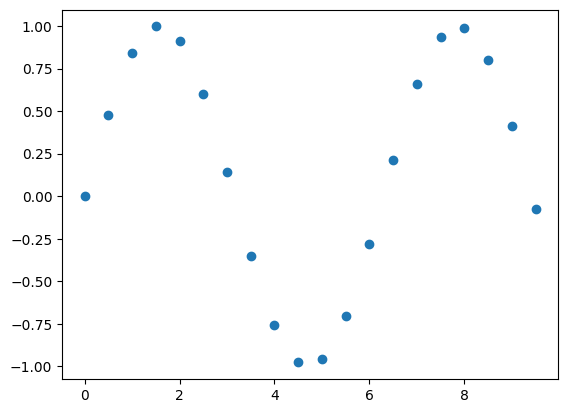

In [69]:
# Scatter plot
plt.scatter(X, Y)
plt.show()

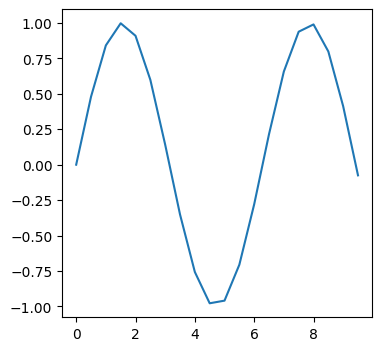

In [72]:
# Line plot
plt.figure(figsize=(4,4)) # change the size of the graph
plt.plot(X, Y)
plt.show()

Again, don't hesitate to look at the doc: https://matplotlib.org/stable/users/index.html

(or ask Google / StackOverflow / ChatGPT etc)

Matplotlib cheat sheets: https://matplotlib.org/cheatsheets/

You are also free to use other libraries to plot/visualize the data, but this is the one I will mostly used.

## Scikit learn and others

Finally, although we will implement some machine learning algorithms ourselves, it will sometimes be more convenient to use already implemented references. Scikit-learn (https://scikit-learn.org/stable/index.html) will be our goto for this.

In [88]:
import sklearn

Their User Guide is really a golden source of information on machine learning, do check it out: https://scikit-learn.org/stable/user_guide.html

Finally, we may also sometimes use libraries like scipy (https://scipy.org/) to perform other mathematical operations when convenient. There is no need to install it, scikit-learn makes heavy use of it anyway so it is already installed as a dependency of scikit-learn.

# Randomness

We can use numpy and matplotlib to generate random points and display the result.

In [76]:
def generate_random_pseudolinear_data(n_data_points=50) -> tuple[float, float]:
    """Generate two vectors X and Y such that Y is approximately linear w.r.t. X"""
     # 50 numbers uniformly sampled in [0,5]
    X = np.random.uniform(0, 5, size=n_data_points)
    # 50 numbers sampled from a normal distribution with mean 2 and standard deviation 1 representing "noise"
    noise = np.random.normal(2, 1, size=n_data_points) 
    Y = 2*X + noise
    return X, Y

For example, this would be interesting synthetical data to practice linear regression. Let's have a look at it:

In [77]:
X, Y = generate_random_pseudolinear_data()

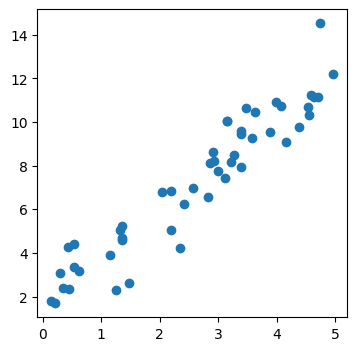

In [78]:
plt.figure(figsize=(4,4)) # change the size of the graph
plt.scatter(X, Y)
plt.show()

Let's regenerate the data and plot it again.

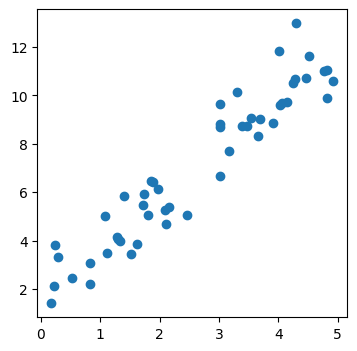

In [79]:
X, Y = generate_random_pseudolinear_data()
plt.figure(figsize=(4,4))
plt.scatter(X, Y)
plt.show()

As you can see, although the data comes from the same distribution, the individual points are not exactly the same. Different points have been generated each time we called the function.

If we want to generate random numbers but still be able to reproduce the results, we can use a *seed* (https://en.wikipedia.org/wiki/Random_seed)

In [85]:
np.random.seed(42) # Let's define 42 as a seed

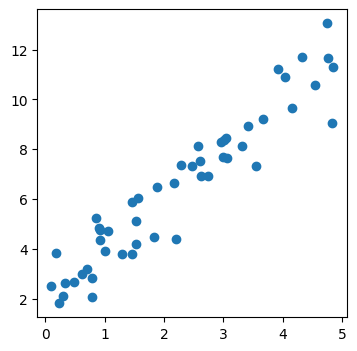

In [86]:
X, Y = generate_random_pseudolinear_data()
plt.figure(figsize=(4,4))
plt.scatter(X, Y)
plt.show()

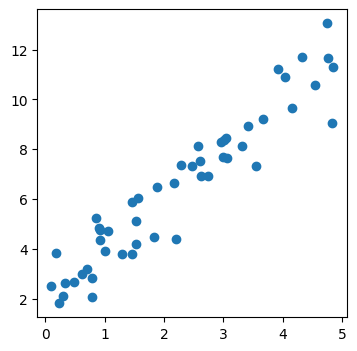

In [87]:
np.random.seed(42) # Let's reuse the same seed.
X, Y = generate_random_pseudolinear_data()
plt.figure(figsize=(4,4))
plt.scatter(X, Y)
plt.show()

Since we initialized the pseudo-random number generator with the same thing both times above, we get the same result. If we want different results, we can use a different seed.

Using seeds makes our experiments more reproducible, and is generally a good practice.

Similarly, scikit-learn enables us to run reproducible experiments with non-deterministic algorithms by using a random state:

In [101]:
from sklearn import datasets

In [102]:
# Let's define a new dataset in the shape of two moons using sklearn
X, _ = sklearn.datasets.make_moons(n_samples=200, shuffle=True, noise=0.05, random_state=42)

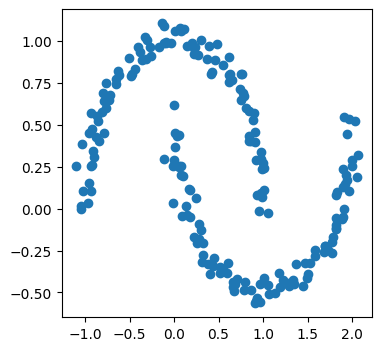

In [108]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1])
plt.show()

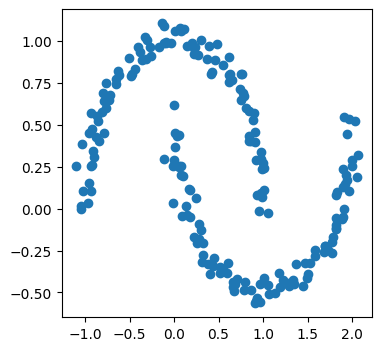

In [110]:
# Let's define and plot it again
X, _ = sklearn.datasets.make_moons(n_samples=200, shuffle=True, noise=0.05, random_state=42)
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1])
plt.show()

Since we used the same seed/random_state, we get the same result. You can try running it again with a different random_state to obtain a different result. (However, as it will be sampled from the same distribution, the overall shape of the dataset will still be the same).